In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

data = pd.read_csv("Advertising.csv" , index_col=0) # bcz there is col named as "unnamed 0" we drop that here
data.head()


,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [69]:
# pip install seaborn

In [70]:
data.shape

(200, 4)

In [71]:
# Check for null values
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB
None
               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000


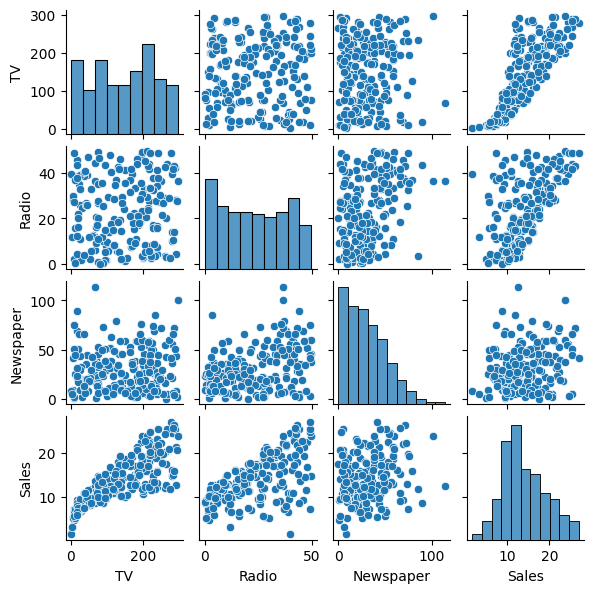

In [72]:
# Visualize correlations
sns.pairplot(data , height=1.5)
plt.show()

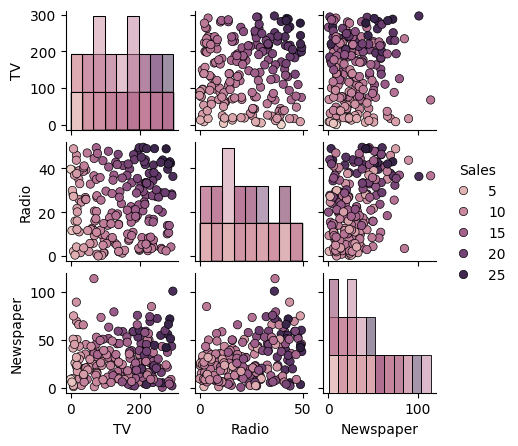

In [73]:
sns.pairplot(data , height=1.5, hue="Sales" , diag_kind="hist" , plot_kws={"edgecolor" : "black"}) # diagonal me KDE (Kernal Density Estimation)
plt.show()

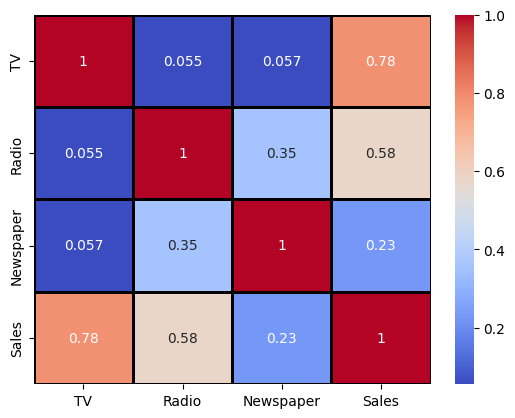

In [74]:
# Display a heatmap for correlation -- colormap -- annotation (no. isnside box)
sns.heatmap(data.corr(), annot=True, cmap='coolwarm' , linecolor="black" , linewidths="2")
plt.show() 

In [75]:
# Define features (X) and target (y)
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")


Training set size: (160, 3)
Testing set size: (40, 3)


In [76]:
# Initialize the model
model = LinearRegression()

# Fit the model
model.fit(X_train, y_train)

# Print coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Coefficients: [0.04472952 0.18919505 0.00276111]
Intercept: 2.979067338122629


In [77]:
model.predict([[230.1, 37.8, 69.2]])

c:\Users\Mahnoor Shahid\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([20.61397147])

In [78]:
# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 3.1740973539761033
R^2 Score: 0.899438024100912


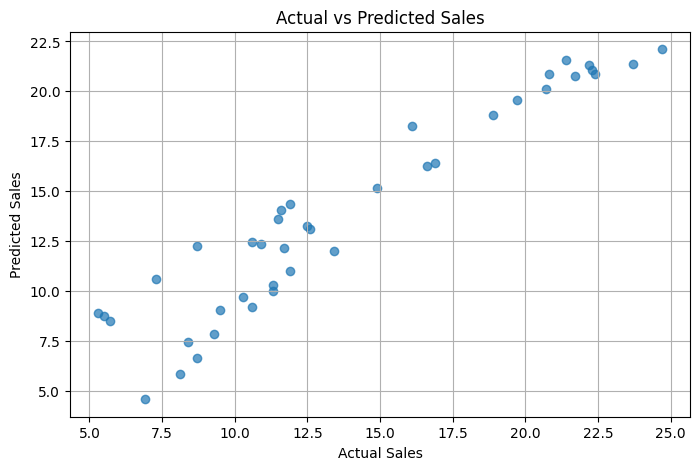

In [79]:
# Plot actual vs predicted values
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.7)  # alpha for transparency
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.grid()
plt.show()


In [80]:
import joblib

# Save the model
joblib.dump(model, 'sales_prediction_model.pkl')

# Load the model (example)
loaded_model = joblib.load('sales_prediction_model.pkl')
